Gaussian naive bayes using iris

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
iris = load_iris()
x = iris.data
y = iris.target

In [42]:
print("Feature Name",iris.feature_names)
print("Target Name",iris.target_names)

Feature Name ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Name ['setosa' 'versicolor' 'virginica']


In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [44]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [45]:
y_train.shape,y_test.shape

((120,), (30,))

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [48]:
y_pred = model.predict(x_test)


In [49]:
print("Accuracy",accuracy_score(y_test, y_pred))

Accuracy 1.0


In [50]:
from sklearn.metrics import classification_report

In [51]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
from sklearn.metrics import confusion_matrix


In [53]:
print("Confusion matix: \n",confusion_matrix(y_test,y_pred))

Confusion matix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

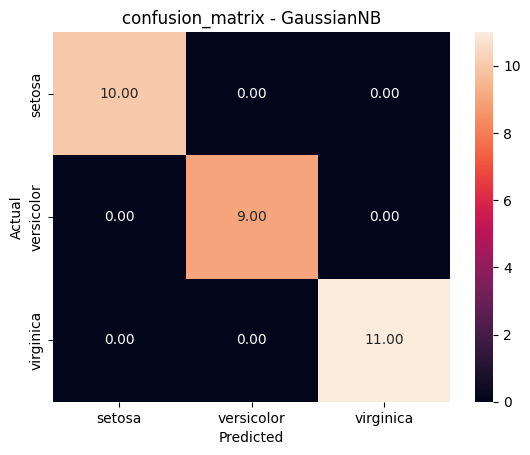

In [54]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f', xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("confusion_matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [55]:
print("\n Preducted Probilityes(First 5 simples): ")
print(model.predict_proba(x_test[:5]))


 Preducted Probilityes(First 5 simples): 
[[5.97327448e-090 9.95635767e-001 4.36423302e-003]
 [1.00000000e+000 4.96158126e-014 6.54922363e-021]
 [7.31890302e-290 4.92947614e-012 1.00000000e+000]
 [2.81842533e-094 9.77593559e-001 2.24064412e-002]
 [1.13877801e-105 8.70022596e-001 1.29977404e-001]]


In [56]:
probs = model.predict_proba(x_test[:5])

In [57]:
import pandas as pd
prob_df = pd.DataFrame(
    probs,
    columns=iris.target_names
)
print("\nProbabolity DataFrame: ")
print(prob_df)


Probabolity DataFrame: 
          setosa    versicolor     virginica
0   5.973274e-90  9.956358e-01  4.364233e-03
1   1.000000e+00  4.961581e-14  6.549224e-21
2  7.318903e-290  4.929476e-12  1.000000e+00
3   2.818425e-94  9.775936e-01  2.240644e-02
4  1.138778e-105  8.700226e-01  1.299774e-01
